1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.linalg as la
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
N = 1000
x1 = np.random.normal(0,1,size=N)
x2 = x1 + np.random.normal(0,3,size=N)
x3 = 2*x1 + x2
X = np.array([x1,x2,x3])

In [3]:
cov = np.cov(X)
l, V = np.linalg.eig(cov)

In [4]:
U, spectrum, Vt = np.linalg.svd(X)
l_svd = spectrum**2/(N-1)
V_svd = U

print("Shape {}".format(X.shape))
print ("Numpy eig:\n")
print ("eigenvalues:",l)
print ("eigenvectors:",V)
print ("\nSVD\n")
print ("eigenvalues:",l_svd)
print ("eigenvectors:",V_svd)

Shape (3, 1000)
Numpy eig:

eigenvalues: [2.65321251e+01 8.55071683e-16 1.99988392e+00]
eigenvectors: [[-0.11344204 -0.81649658  0.56609561]
 [-0.57988066 -0.40824829 -0.70503316]
 [-0.80676473  0.40824829  0.42715806]]

SVD

eigenvalues: [2.65458844e+01 2.00078383e+00 4.32869628e-32]
eigenvectors: [[-0.11352321  0.56607934 -0.81649658]
 [-0.57977955 -0.70511631 -0.40824829]
 [-0.80682597  0.42704236  0.40824829]]


# NOTICE

The results are correct, just swap the first and the third column. Difference due to machine precision.

In [5]:
#using svd ordered results
Lambda=np.diag(l_svd)
print ("Lambda {}".format(Lambda))
#cov matrix Trace
print ("Covariance trace:", cov.trace())
#lambda trace
print ("Lambda trace:", Lambda.trace())

print ("Percentage: {}".format(Lambda[0,0]/Lambda.trace()))


Lambda [[2.65458844e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.00078383e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.32869628e-32]]
Covariance trace: 28.532009015295976
Lambda trace: 28.54666827316853
Percentage: 0.9299118268840438


In [6]:
Lambda=np.diag(l_svd[0:2])
print ("Lambda {}".format(Lambda))
#cov matrix Trace
print ("Covariance trace:", cov.trace())
#lambda trace
print ("Lambda trace:", Lambda.trace())

print ("Percentage: {}".format(Lambda[0,0]/Lambda.trace()))
print ("Trace not vary. Right result!")
print ("Total variability: {}".format((l_svd[0]+l_svd[1])/sum(l_svd)))

Lambda [[26.54588445  0.        ]
 [ 0.          2.00078383]]
Covariance trace: 28.532009015295976
Lambda trace: 28.54666827316853
Percentage: 0.9299118268840438
Trace not vary. Right result!
Total variability: 1.0


Text(0.5, 1.0, 'new 2 vs 3')

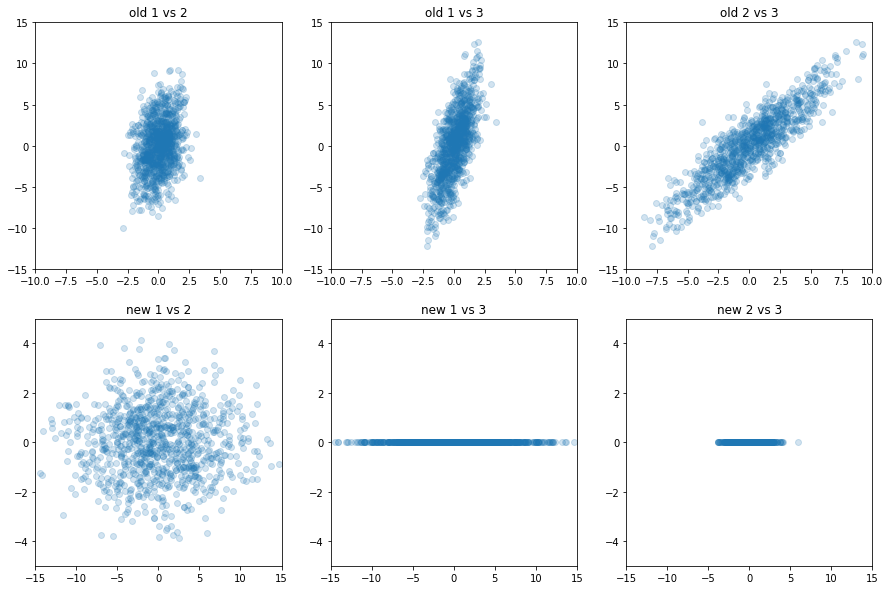

In [7]:
Xp = np.dot(X.T, U).T
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax1[0].scatter(X[0,:],X[1,:], alpha=0.2)
ax1[1].scatter(X[0,:],X[2,:], alpha=0.2)
ax1[2].scatter(X[1,:],X[2,:], alpha=0.2)

ax2[0].scatter(Xp[0,:],Xp[1,:], alpha=0.2)
ax2[1].scatter(Xp[0,:],Xp[2,:], alpha=0.2)
ax2[2].scatter(Xp[1,:],Xp[2,:], alpha=0.2)

for j in range(0,3):
    #not same axis limit to get some comparison with seaborn
    ax1[j].axis([-10,10,-15,15])
    ax2[j].axis([-15,15,-5,5])
    
ax1[0].set_title("old {} vs {}".format(1,2))
ax2[0].set_title("new {} vs {}".format(1,2))
ax1[1].set_title("old {} vs {}".format(1,3))
ax2[1].set_title("new {} vs {}".format(1,3))
ax1[2].set_title("old {} vs {}".format(2,3))
ax2[2].set_title("new {} vs {}".format(2,3))

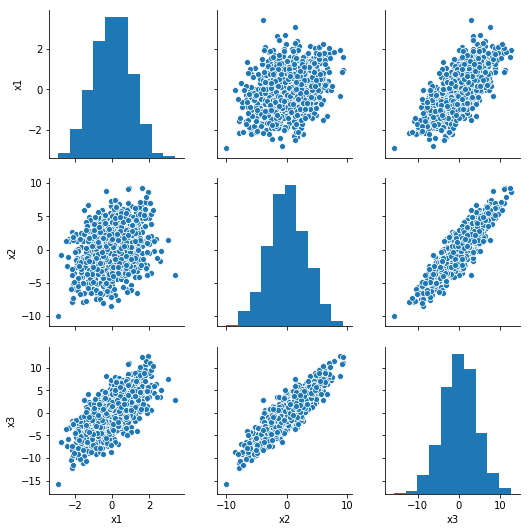

In [8]:
import seaborn as sns
data = pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3})
sns.pairplot(data)

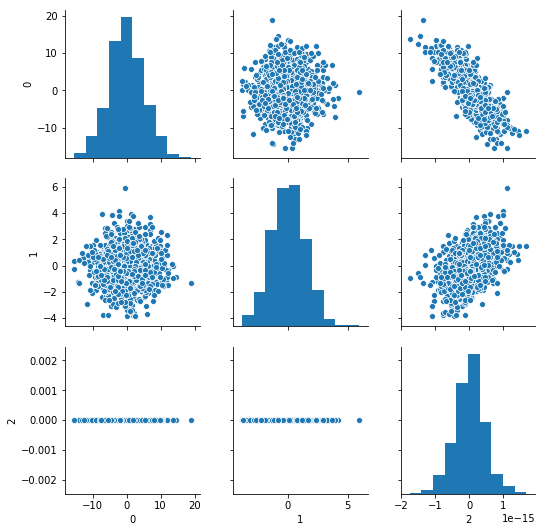

In [9]:
data = pd.DataFrame(Xp.T)
sns.pairplot(data)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [41]:
n1 = np.zeros((10,N))
n2 = np.zeros((10,N))
for i in range(10):
    mean = 0
    std = np.random.uniform(0.01,0.03)
    n1[i] = np.random.normal(mean,std,N)
    std = np.random.uniform(0.01,0.12)
    n2[i] = np.random.normal(mean,std,N)

x1 = np.random.normal(0,1,1000) + n1.sum(axis=0)
x2 = np.random.normal(0,3,1000) + x1 + n2.sum(axis=0)
df = pd.DataFrame({'x1':x1,'x2':x2,'x3':(2*x1+x2)})
df.shape

(1000, 3)

In [42]:
cov = np.cov(df, rowvar=False)
l, V = np.linalg.eig(cov)
print ("Covariance:{}\n".format(cov))

U, spectrum, Vt = np.linalg.svd(X)
l_svd = spectrum**2/(N-1)
V_svd = U

print ("Numpy eig:\n")
print ("eigenvalues:",l)
print ("eigenvectors:",V)
print ("\nSVD\n")
print ("eigenvalues:",l_svd)
print ("eigenvectors:",V_svd)

Covariance:[[ 0.9706032   1.04753758  2.98874397]
 [ 1.04753758 10.28147488 12.37655004]
 [ 2.98874397 12.37655004 18.35403798]]

Numpy eig:

eigenvalues: [2.76809128e+01 5.50600427e-16 1.92520329e+00]
eigenvectors: [[-0.11299899 -0.81649658  0.56618421]
 [-0.58043222 -0.40824829 -0.70457914]
 [-0.8064302   0.40824829  0.42778928]]

SVD

eigenvalues: [2.65458844e+01 2.00078383e+00 4.32869628e-32]
eigenvectors: [[-0.11352321  0.56607934 -0.81649658]
 [-0.57977955 -0.70511631 -0.40824829]
 [-0.80682597  0.42704236  0.40824829]]


In [43]:
found_variability = l/np.sum(l)

print('variability per principal component:',found_variability)

variability per principal component: [9.34972784e-01 1.85975231e-17 6.50272157e-02]


In [44]:
#using svd ordered results
Lambda=np.diag(l_svd)
print ("Lambda {}".format(Lambda))
#cov matrix Trace
print ("Covariance trace:", cov.trace())
#lambda trace
print ("Lambda trace:", Lambda.trace())

print ("Percentage: {}".format(Lambda[0,0]/Lambda.trace()))


Lambda [[2.65458844e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.00078383e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.32869628e-32]]
Covariance trace: 29.606116053514256
Lambda trace: 28.54666827316853
Percentage: 0.9299118268840438


In [45]:
#using svd ordered results
Lambda=np.diag(l_svd[0:2])
print ("Lambda {}".format(Lambda))
#cov matrix Trace
print ("Covariance trace:", cov.trace())
#lambda trace
print ("Lambda trace:", Lambda.trace())

print ("Percentage: {}".format(Lambda[0,0]/Lambda.trace()))

print ("Trace not vary. Right result!")
print ("Total variability: {}".format((l_svd[0]+l_svd[1])/sum(l_svd)))

Lambda [[26.54588445  0.        ]
 [ 0.          2.00078383]]
Covariance trace: 29.606116053514256
Lambda trace: 28.54666827316853
Percentage: 0.9299118268840438
Trace not vary. Right result!
Total variability: 1.0


Text(0.5, 1.0, 'new 2 vs 3')

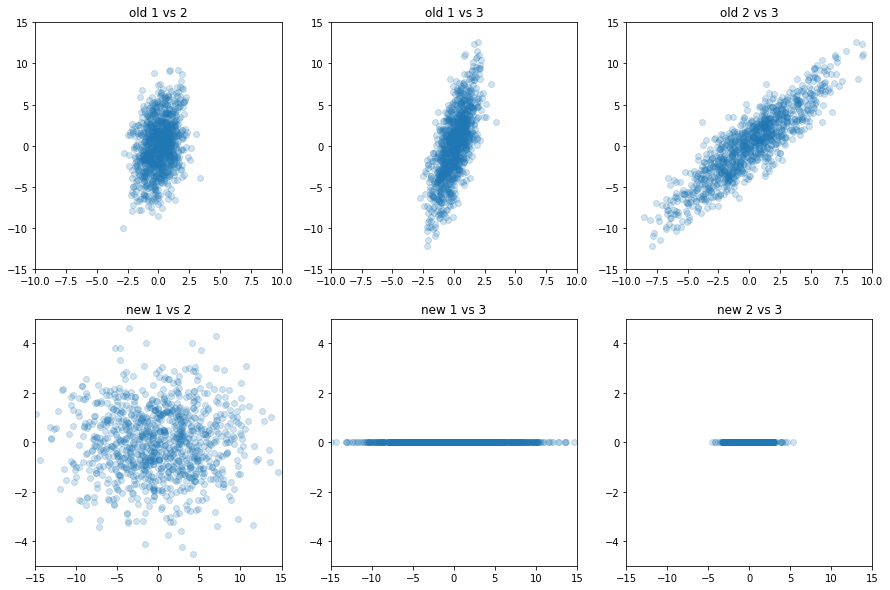

In [46]:
Xp = np.dot(df, U).T
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax1[0].scatter(X[0,:],X[1,:], alpha=0.2)
ax1[1].scatter(X[0,:],X[2,:], alpha=0.2)
ax1[2].scatter(X[1,:],X[2,:], alpha=0.2)

ax2[0].scatter(Xp[0,:],Xp[1,:], alpha=0.2)
ax2[1].scatter(Xp[0,:],Xp[2,:], alpha=0.2)
ax2[2].scatter(Xp[1,:],Xp[2,:], alpha=0.2)

for j in range(0,3):
    #not same axis limit to get some comparison with seaborn
    ax1[j].axis([-10,10,-15,15])
    ax2[j].axis([-15,15,-5,5])
    
ax1[0].set_title("old {} vs {}".format(1,2))
ax2[0].set_title("new {} vs {}".format(1,2))
ax1[1].set_title("old {} vs {}".format(1,3))
ax2[1].set_title("new {} vs {}".format(1,3))
ax1[2].set_title("old {} vs {}".format(2,3))
ax2[2].set_title("new {} vs {}".format(2,3))

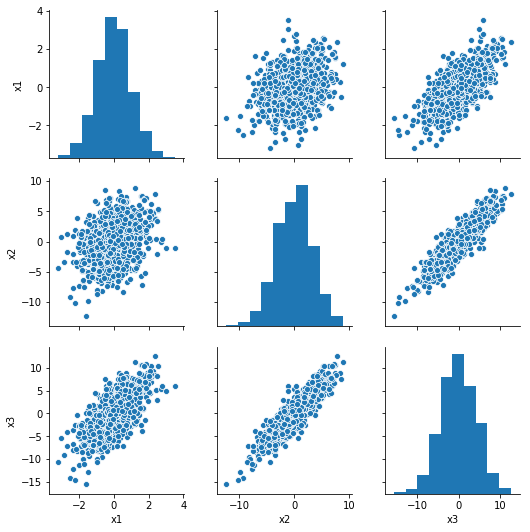

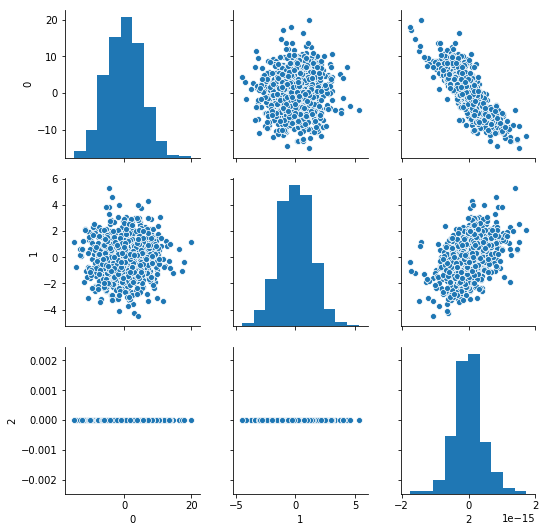

In [47]:
sns.pairplot(df)
sns.pairplot(pd.DataFrame(Xp.T))

In [48]:
print(n1.sum(axis=0))

[ 4.65871237e-02  3.26864792e-02  1.69460150e-01  1.28925228e-02
  1.15393610e-01  5.80479468e-02  4.18953048e-02 -2.93204529e-02
  1.22310765e-02  1.09891751e-01 -4.95060543e-02 -7.18270103e-02
 -7.22421976e-02 -7.05094637e-02 -2.01212933e-01 -3.79919738e-02
 -7.72512599e-02 -3.85483118e-02  3.25861989e-02 -2.80607055e-02
 -5.45882352e-02 -6.22444873e-02 -6.52866409e-03  1.08685001e-02
  1.48571299e-02  8.80590254e-02 -5.32564045e-02  3.42459449e-02
 -3.35967514e-02  6.73825437e-02 -1.64318126e-02  6.99954139e-02
  3.16120417e-02  9.49715859e-02 -2.13771505e-01  1.57238740e-01
 -5.76459421e-03 -7.76630709e-02 -2.05472137e-02  7.20467216e-02
 -1.04727111e-02  2.47535963e-02 -8.15953011e-02  1.79390682e-01
  5.20922669e-02 -4.46066801e-02 -1.45751971e-02 -4.31621244e-02
 -3.25301664e-02 -1.35766635e-02 -4.63091539e-02  5.27171588e-02
  4.06482035e-02  1.49900780e-02 -4.21757432e-03  1.06190227e-01
  4.19569213e-02 -2.90266328e-02  6.68071055e-03  3.58270256e-02
  2.70653592e-02 -3.99538

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [49]:
w = 2
A = 1
N = 1000
data = np.zeros((10,N,3))
phi = 0
time = np.arange(0, 10, 10/N)

x = A*np.sin(w*time+phi)
y = np.random.normal(0, 1/5, N)
data[0] = np.array([x,y,z]).T
i = 1

NameError: name 'z' is not defined

In [ ]:
plt.plot(x,y,'*')

In [ ]:
import math
i = 1
for theta in [math.pi/6,math.pi/4,math.pi/2]:
    for gamma in [math.pi/6,math.pi/4,math.pi/3]:
        R1 = [[math.cos(theta), math.sin(theta), 0], [-math.sin(theta), math.cos(theta), 0], [0,0,1]]
        R2 = [[math.cos(gamma), 0, -math.sin(gamma)], [0,1,0] , [math.sin(gamma), 0, math.cos(gamma)]]
        R = np.matmul(R1,R2)
        data_rot = np.matmul(R,data[0].T)
        data[i] = data_rot.T
        i+=1

In [ ]:
fig, plots = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
i = 0
j = 0
for record in data:
    plots[j][i].plot(record[:,0], record[:,1],'*')
    plots[j][i].axis([-1.5,1.5,-1.5,1.5])
    plots[j][i].set_aspect('equal')
    i+=1
    if i == 2:
        j += 1
        i = 0
plt.show()

In [ ]:
U, s, V = np.linalg.svd(data)

e = s**2/(N-1)

var = e/np.sum(e)

print('fraction of variability per pc:',var)

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
csv = pd.read_csv('data/magic04.data', names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'fClass'])
csv.loc[csv['fClass'] =='h', 'fClass'] = 0
csv.loc[csv['fClass'] =='g', 'fClass'] = 1
transp = new_csv.T

In [ ]:
l, V = np.linalg.eig(np.cov(transp))
Lambda=np.diag(l)
print ("A.trace():", np.cov(transp).trace())
print ("Lambda.trace():", Lambda.trace())

print (Lambda[0,0]/Lambda.trace())


In [ ]:
U, s, V = np.linalg.svd(transp)

e = s**2/(transp.size-1)

var = e/np.sum(e)

print('fraction of variability per pc:',var)

In [ ]:
l, V = np.linalg.eig(np.cov(transp))
Lambda=np.diag(l[-2:])
print ("A.trace():", np.cov(transp).trace())
print ("Lambda.trace():", Lambda.trace())

print (Lambda[0,0]/Lambda.trace())
